# Project: Yelp Rating Regression Predictor

Using a Multiple Linear Regression model to investigate what factors most affect a restaurant's Yelp rating and predict the Yelp rating for Danielle's Delicious Delicacies restaurant!

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Load and Inspect Data 

In [2]:
businesses = pd.read_json('yelp_business.json',lines=True)
reviews = pd.read_json('yelp_review.json',lines=True)
users = pd.read_json('yelp_user.json',lines=True)
checkins = pd.read_json('yelp_checkin.json',lines=True)
tips = pd.read_json('yelp_tip.json',lines=True)
photos = pd.read_json('yelp_photo.json',lines=True)

In [3]:
pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 500

In [4]:
businesses.head()

,address,alcohol?,attributes,business_id,categories,city,good_for_kids,has_bike_parking,has_wifi,hours,is_open,latitude,longitude,name,neighborhood,postal_code,price_range,review_count,stars,state,take_reservations,takes_credit_cards
0,1314 44 Avenue NE,0,"{'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'GoodForKids': 'True', 'HasTV': 'True', 'NoiseLevel': 'average', 'OutdoorSeating': 'False', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'True', 'RestaurantsTakeOut': 'True'}",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel",Calgary,1,0,0,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0'}",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,2,24,4.0,AB,1,1
1,,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}', 'Caters': 'True', 'DogsAllowed': 'True', 'DriveThru': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfast': False, 'brunch': False}', 'HasTV': 'False', 'OutdoorSeating': 'True', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery'...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendors, Barbeque, Food Trucks, Food, Restaurants, Event Planning & Services",Henderson,1,0,0,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0', 'Sunday': '17:0-23:0'}",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,2,3,4.5,NV,0,1
2,1335 rue Beaubien E,1,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}', 'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}', 'Caters': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfa...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandwiches, Cafes",Montréal,1,1,1,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0', 'Wednesday': '10:0-22:0', 'Thursday': '10:0-22:0', 'Friday': '10:0-22:0', 'Saturday': '10:0-22:0', 'Sunday': '10:0-22:0'}",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,2,5,4.0,QC,1,0
3,211 W Monroe St,0,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,0,0,0,None,1,33.449999,-112.076979,Geico Insurance,,85003,0,8,1.5,AZ,0,0
4,2005 Alyth Place SE,0,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping, Local Services, Automotive, Electronics Repair",Calgary,0,0,0,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', 'Wednesday': '8:0-17:0', 'Thursday': '8:0-17:0', 'Friday': '8:0-17:0'}",1,51.035591,-114.027366,Action Engine,,T2H 0N5,0,4,2.0,AB,0,1


In [5]:
reviews.head()

,business_id,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes
0,--1UhMGODdWsrMastO9DZw,524.458333,466.208333,0.808638,1,16,15
1,--6MefnULPED_I942VcFNA,1199.589744,785.205128,0.669126,27,32,53
2,--7zmmkVg-IMGaXbuVd0SQ,717.851852,536.592593,0.820837,29,52,81
3,--8LPVSo5i0Oo61X01sV9A,751.750000,478.250000,0.170925,0,0,9
4,--9QQLMTbFzLJ_oT-ON3Xw,978.727273,436.181818,0.562264,3,4,7


In [6]:
users.head()

,business_id,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite
0,--1UhMGODdWsrMastO9DZw,18.791667,1789.750000,1.833333,57.541667,0.833333
1,--6MefnULPED_I942VcFNA,214.564103,2039.948718,49.256410,332.743590,1.769231
2,--7zmmkVg-IMGaXbuVd0SQ,126.185185,1992.796296,19.222222,208.962963,1.814815
3,--8LPVSo5i0Oo61X01sV9A,25.250000,2095.750000,0.500000,7.500000,0.000000
4,--9QQLMTbFzLJ_oT-ON3Xw,52.454545,1804.636364,1.000000,34.636364,0.090909


In [7]:
checkins.head()

,business_id,time,weekday_checkins,weekend_checkins
0,7KPBkxAOEtb3QeIL9PEErg,"{'Fri-0': 2, 'Sat-0': 1, 'Sun-0': 1, 'Wed-0': 2, 'Fri-1': 1, 'Sat-1': 3, 'Thu-1': 1, 'Wed-1': 1, 'Sat-2': 1, 'Sun-2': 2, 'Thu-2': 1, 'Wed-2': 1, 'Fri-3': 1, 'Sun-3': 3, 'Mon-4': 1, 'Thu-4': 1, 'Tue-4': 2, 'Wed-4': 2, 'Sun-6': 1, 'Wed-6': 1, 'Thu-7': 1, 'Fri-10': 3, 'Mon-10': 1, 'Sat-10': 3, 'Sun-10': 3, 'Tue-10': 2, 'Mon-11': 1, 'Thu-11': 1, 'Wed-11': 2, 'Mon-12': 1, 'Sat-12': 1, 'Tue-12': 1, 'Sat-13': 3, 'Thu-13': 1, 'Tue-13': 2, 'Wed-13': 3, 'Fri-14': 2, 'Mon-14': 1, 'Sat-14': 1, 'Sun-14':...",76,75
1,kREVIrSBbtqBhIYkTccQUg,"{'Mon-13': 1, 'Thu-13': 1, 'Sat-16': 1, 'Wed-17': 1, 'Sun-19': 1, 'Thu-20': 1, 'Sat-21': 1}",4,3
2,tJRDll5yqpZwehenzE2cSg,"{'Thu-0': 1, 'Mon-1': 1, 'Mon-12': 1, 'Sat-16': 1, 'Sun-22': 1, 'Fri-23': 1}",3,3
3,tZccfdl6JNw-j5BKnCTIQQ,"{'Sun-14': 1, 'Fri-18': 1, 'Mon-20': 1}",1,2
4,r1p7RAMzCV_6NPF0dNoR3g,"{'Sat-3': 1, 'Sun-18': 1, 'Sat-21': 1, 'Sat-23': 1, 'Thu-23': 1}",1,4


In [8]:
tips.head()

,business_id,average_tip_length,number_tips
0,--1UhMGODdWsrMastO9DZw,79.000000,1
1,--6MefnULPED_I942VcFNA,49.857143,14
2,--7zmmkVg-IMGaXbuVd0SQ,52.500000,10
3,--9QQLMTbFzLJ_oT-ON3Xw,136.500000,2
4,--9e1ONYQuAa-CB_Rrw7Tw,68.064935,154


In [9]:
photos.head()

,business_id,average_caption_length,number_pics
0,--1UhMGODdWsrMastO9DZw,0.000000,1
1,--6MefnULPED_I942VcFNA,67.500000,2
2,--9e1ONYQuAa-CB_Rrw7Tw,30.426471,136
3,--DaPTJW3-tB1vP-PfdTEg,0.000000,1
4,--FBCX-N37CMYDfs790Bnw,5.500000,4


In [10]:
print('There are {} businesses in this dataset'.format(len(businesses)))
len(businesses)
reviews.columns

There are 188593 businesses in this dataset


Index(['business_id', 'average_review_age', 'average_review_length',
       'average_review_sentiment', 'number_funny_votes', 'number_cool_votes',
       'number_useful_votes'],
      dtype='object')

In [11]:
users.describe()

,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite
count,188593.000000,188593.000000,188593.000000,188593.000000,188593.000000
mean,105.132000,2005.367009,11.590148,122.110660,0.923313
std,162.653680,554.174540,25.901801,208.814471,1.109289
min,1.000000,76.000000,0.000000,0.666667,0.000000
25%,26.666667,1647.000000,0.666667,21.000000,0.000000
50%,59.384615,1957.150000,3.583333,62.142857,0.583333
75%,117.666667,2312.238095,11.555556,143.454545,1.400000
max,4219.000000,4860.000000,1174.666667,6335.000000,10.666667


What is the Yelp rating, or `stars`, of the establishment with `business_id` = `5EvUIR4IzCWUOm0PsUZXjA`?

In [12]:
businesses[businesses['business_id'] == '5EvUIR4IzCWUOm0PsUZXjA']['stars']

30781    3.0
Name: stars, dtype: float64

## Merge the Data

In [13]:
df = pd.merge(businesses, reviews, how='left', on='business_id')
print(len(df))

188593


In [14]:
df = pd.merge(df, users, how='left', on='business_id')
df = pd.merge(df, checkins, how='left', on='business_id')
df = pd.merge(df, tips, how='left', on='business_id')
df = pd.merge(df, photos, how='left', on='business_id')

In [15]:
df.dtypes

address                        object
alcohol?                        int64
attributes                     object
business_id                    object
categories                     object
city                           object
good_for_kids                   int64
has_bike_parking                int64
has_wifi                        int64
hours                          object
is_open                         int64
latitude                      float64
longitude                     float64
name                           object
neighborhood                   object
postal_code                    object
price_range                     int64
review_count                    int64
stars                         float64
state                          object
take_reservations               int64
takes_credit_cards              int64
average_review_age            float64
average_review_length         float64
average_review_sentiment      float64
number_funny_votes              int64
number_cool_

## Clean the Data

Drop features we do not want to make predictions on. 

In [16]:
features_to_remove = ['address','attributes','business_id','categories','city','hours','is_open','latitude','longitude','name','neighborhood','postal_code','state','time']
df.drop(labels=features_to_remove, axis =1, inplace=True)

In [17]:
df.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_funny_votes            False
number_cool_votes             False
number_useful_votes           False
average_number_friends        False
average_days_on_yelp          False
average_number_fans           False
average_review_count          False
average_number_years_elite    False
weekday_checkins               True
weekend_checkins               True
average_tip_length             True
number_tips                    True
average_caption_length         True
number_pics                    True
dtype: bool

Fill the missing values in `df` with `0`. 

In [18]:
df.fillna({'weekday_checkins':0,
           'weekend_checkins':0,
           'average_tip_length':0,
           'number_tips':0,
           'average_caption_length':0,
           'number_pics':0},
          inplace=True)

In [19]:
df.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_funny_votes            False
number_cool_votes             False
number_useful_votes           False
average_number_friends        False
average_days_on_yelp          False
average_number_fans           False
average_review_count          False
average_number_years_elite    False
weekday_checkins              False
weekend_checkins              False
average_tip_length            False
number_tips                   False
average_caption_length        False
number_pics                   False
dtype: bool

## Exploratory Analysis

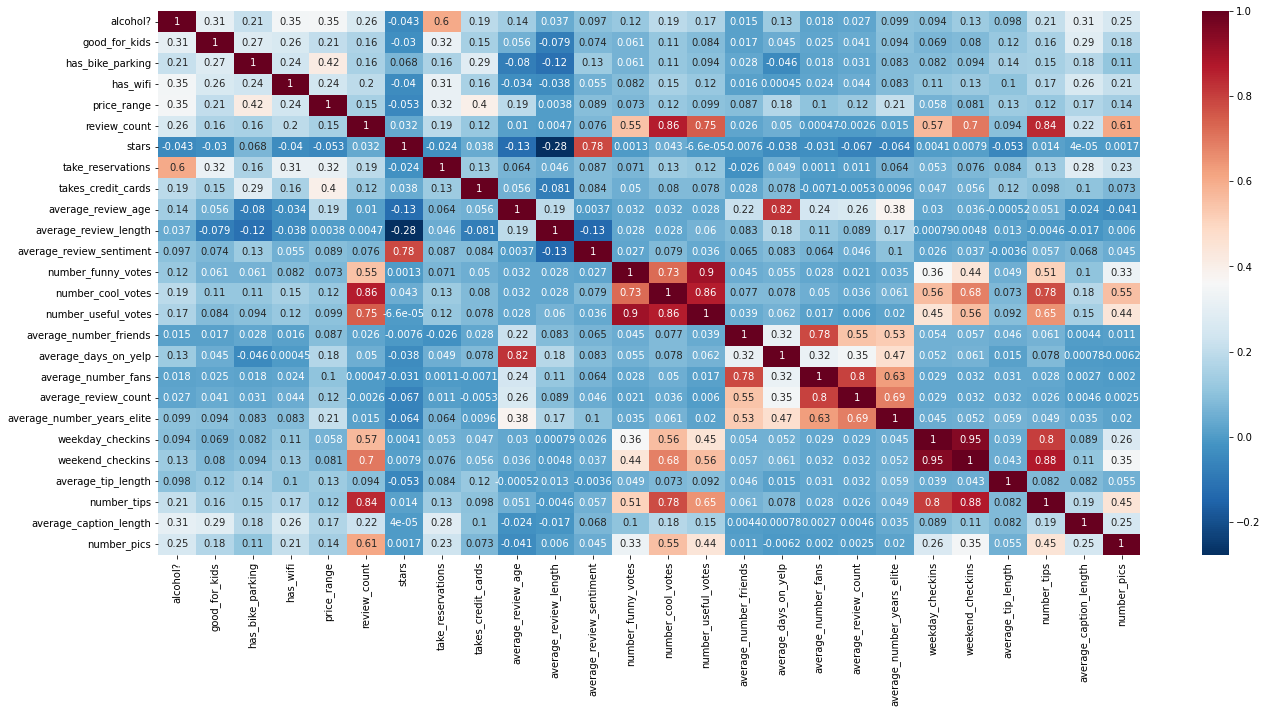

<Figure size 432x288 with 0 Axes>

In [20]:
corr_matrix = df.corr(method='pearson')
plt.figure(figsize = (22,10))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r')
plt.show()
plt.clf()

### Visualization

>What is `average_review_sentiment`, you ask? `average_review_sentiment` is the average sentiment score for all reviews on a business' Yelp page. The sentiment score for a review was calculated using the sentiment analysis tool [VADER](https://github.com/cjhutto/vaderSentiment). VADER uses a labeled set of positive and negative words, along with codified rules of grammar, to estimate how positive or negative a statement is. Scores range from `-1`, most negative, to `+1`, most positive, with a score of `0` indicating a neutral statement. While not perfect, VADER does a good job at guessing the sentiment of text data!

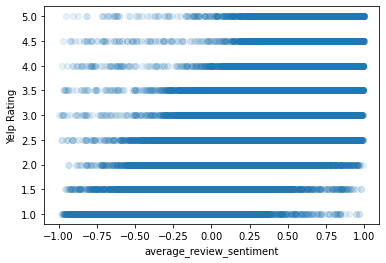

<Figure size 432x288 with 0 Axes>

In [21]:
# plot average_review_sentiment against stars here
plt.scatter(df['average_review_sentiment'],df['stars'],alpha=0.1)
plt.xlabel('average_review_sentiment')
plt.ylabel('Yelp Rating')
plt.show()
plt.clf()

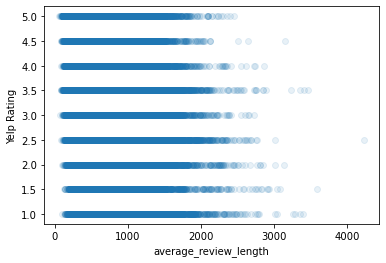

<Figure size 432x288 with 0 Axes>

In [22]:
# plot average_review_length against stars here
plt.scatter(df['average_review_length'],df['stars'],alpha=0.1)
plt.xlabel('average_review_length')
plt.ylabel('Yelp Rating')
plt.show()
plt.clf()

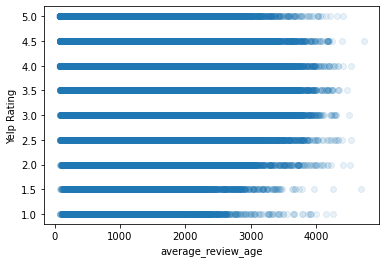

<Figure size 432x288 with 0 Axes>

In [23]:
# plot average_review_age against stars here
plt.scatter(df['average_review_age'],df['stars'],alpha=0.1)
plt.xlabel('average_review_age')
plt.ylabel('Yelp Rating')
plt.show()
plt.clf()

## Data Selection

#### Selecting 'average_review_length' and 'average_review_age' for Linear Regression

In [24]:
features = df[['average_review_length', 'average_review_age']]
ratings = df['stars']

## Split the Data into Training and Testing Sets

In [25]:
X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)

## Create and Train the Model

In [26]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

## Evaluate and Understand the Model

Using the `.score()` method, we will calculate the R^2 value for our model. Remember, R^2 is the coefficient of determination, or a measure of how much of the variance in our dependent variable, the predicted Yelp rating, is explained by our independent variables, our feature data. 

In [27]:
print('Training Score:')
model.score(X_train, y_train)

Training Score:


0.08250309566544889

In [28]:
print('Test Score:')
model.score(X_test, y_test)

Test Score:


0.08083081210060561

After all that hard work, we can finally take a look at the coefficients on our different features! The model has an attribute `.coef_` which is an array of the feature coefficients determined by fitting our model to the training data. To make it easier for you to see which feature corresponds to which coefficient, we have provided some code in the cell that `zip`s together a list of our features with the coefficients and sorts them in descending order from most predictive to least predictive.

In [29]:
print('Feature Coefficients:')
sorted(list(zip(['average_review_length','average_review_age'],model.coef_)),key = lambda x: abs(x[1]),reverse=True)

Feature Coefficients:


[('average_review_length', -0.0009977176852074476),
 ('average_review_age', -0.00011621626836366517)]

Using the predict method, we will calculate the predicted Yelp ratings for our testing data and compare them to their actual Yelp ratings! 

In [30]:
y_predicted = model.predict(X_test)

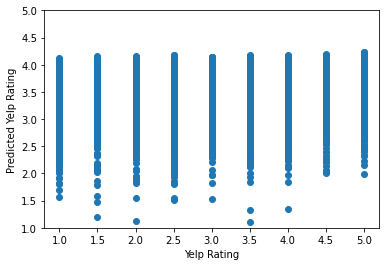

In [31]:
plt.scatter(y_test,y_predicted)
plt.xlabel('Yelp Rating')
plt.ylabel('Predicted Yelp Rating')
plt.ylim(1,5)
plt.show()

## Define Different Subsets of Data

After evaluating the first model, we see that `average_review_length` and `average_review_age` alone are not the best predictors for Yelp rating. Let's go do some more modeling.

In [32]:
# subset of only average review sentiment
sentiment = ['average_review_sentiment']

In [33]:
# subset of all features that have a response range [0,1]
binary_features = ['alcohol?','has_bike_parking','takes_credit_cards','good_for_kids','take_reservations','has_wifi']

In [34]:
# subset of all features that vary on a greater range than [0,1]
numeric_features = ['review_count','price_range','average_caption_length','number_pics','average_review_age','average_review_length','average_review_sentiment','number_funny_votes','number_cool_votes','number_useful_votes','average_tip_length','number_tips','average_number_friends','average_days_on_yelp','average_number_fans','average_review_count','average_number_years_elite','weekday_checkins','weekend_checkins']

In [35]:
# all features
all_features = binary_features + numeric_features

In [36]:
# selected features 
selected_features = ['review_count', 'average_review_sentiment', 'average_number_fans', 'average_review_count', 'average_number_years_elite']

## Further Modeling

Now that we have lists of different feature subsets, we can create new models from them. In order to more easily compare the performance of these new models, we have created a function for you below called `model_these_features()`. This function replicates the model building process you just completed with our first model! Take some time to review how the function works, analyzing it line by line. Fill in the empty comments with an explanation of the task the code beneath it is performing.

In [37]:
# take a list of features to model as a parameter
def model_these_features(feature_list):
    
    #Define ratings and features
    ratings = df.loc[:,'stars']
    features = df.loc[:,feature_list]
    
    #Split Data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
    
    #Allow the model to work when we model on just one feature instead of multiple features.
    if len(X_train.shape) < 2:
        X_train = np.array(X_train).reshape(-1,1)
        X_test = np.array(X_test).reshape(-1,1)
    
    #Create and train the model
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    #print training and test scores
    print('Train Score:', model.score(X_train,y_train))
    print('Test Score:', model.score(X_test,y_test))
    
    # print the model features and their corresponding coefficients, from most predictive to least predictive
    print(sorted(list(zip(feature_list,model.coef_)),key = lambda x: abs(x[1]),reverse=True))
    
    #calculate the predicted Yelp ratings for our testing data 
    y_predicted = model.predict(X_test)
    
    #Visualize Predicted Yelp ratings vs actual Yelp ratings!
    plt.scatter(y_test,y_predicted)
    plt.xlabel('Yelp Rating')
    plt.ylabel('Predicted Yelp Rating')
    plt.ylim(1,5)
    plt.show()

Run models on the following subsets of data using `model_these_features()`

Train Score: 0.6118980950438655
Test Score: 0.6114021046919491
[('average_review_sentiment', 2.3033908433749724)]


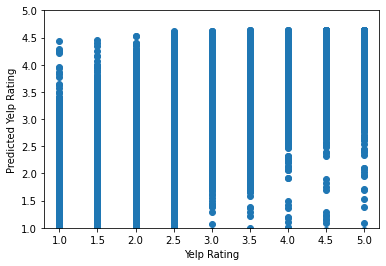

In [38]:
# create a model on sentiment 
model_these_features(sentiment)

Train Score: 0.012223180709591053
Test Score: 0.010119542202269072
[('has_bike_parking', 0.19003008208038458), ('alcohol?', -0.14549670708143855), ('has_wifi', -0.1318739757776523), ('good_for_kids', -0.08632485990337194), ('takes_credit_cards', 0.07175536492198106), ('take_reservations', 0.045265585304519)]


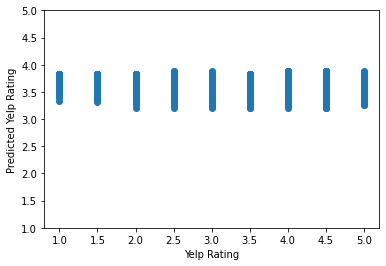

In [39]:
# create a model on all binary features 
model_these_features(binary_features)

Train Score: 0.6734992593766658
Test Score: 0.6713318798120165
[('average_review_sentiment', 2.2721076642095275), ('price_range', -0.08046080962701413), ('average_number_years_elite', -0.07190366288054345), ('average_caption_length', -0.00334706600778262), ('number_pics', -0.0029565028128930053), ('number_tips', -0.0015953050789028617), ('number_cool_votes', 0.0011468839227081994), ('average_number_fans', 0.0010510602097406957), ('average_review_length', -0.0005813655692089032), ('average_tip_length', -0.000532203206346091), ('number_useful_votes', -0.00023203784758725476), ('average_review_count', -0.00022431702894981553), ('average_review_age', -0.00016930608165051028), ('average_days_on_yelp', 0.0001287802587665995), ('weekday_checkins', 5.918580754463165e-05), ('weekend_checkins', -5.5181762069790585e-05), ('average_number_friends', 4.82699211162064e-05), ('review_count', -3.483483763798152e-05), ('number_funny_votes', -7.884395673698336e-06)]


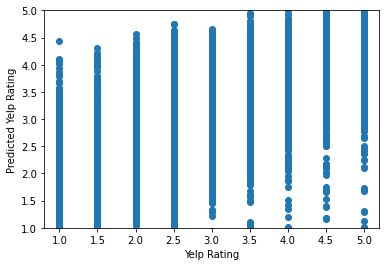

In [40]:
# create a model on all numeric features 
model_these_features(numeric_features)

Train Score: 0.6807828861895334
Test Score: 0.678212904586925
[('average_review_sentiment', 2.2808456996623665), ('alcohol?', -0.14991498593468902), ('has_wifi', -0.12155382629263672), ('good_for_kids', -0.11807814422013525), ('price_range', -0.0648673015004225), ('average_number_years_elite', -0.0627893971389532), ('has_bike_parking', 0.027296969912270045), ('takes_credit_cards', 0.02445183785363297), ('take_reservations', 0.01413455917297423), ('number_pics', -0.0013133612300804355), ('average_number_fans', 0.0010267986822656682), ('number_cool_votes', 0.0009723722734409413), ('number_tips', -0.0008546563320871651), ('average_caption_length', -0.0006472749798196166), ('average_review_length', -0.0005896257920272596), ('average_tip_length', -0.0004205217503410164), ('number_useful_votes', -0.00027150641256143675), ('average_review_count', -0.00023398356902507977), ('average_review_age', -0.00015776544111324037), ('average_days_on_yelp', 0.00012326147662883487), ('review_count', 0.0001

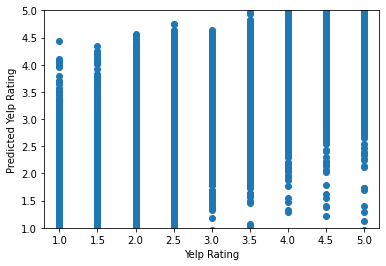

In [41]:
# create a model on all features 
model_these_features(all_features)

Train Score: 0.633317894835516
Test Score: 0.6333950204648191
[('average_review_sentiment', 2.3490046785064713), ('average_number_years_elite', -0.13044642263826972), ('average_number_fans', 0.0010891266097192188), ('review_count', -0.00025595724861303144), ('average_review_count', -0.00013103396628144637)]


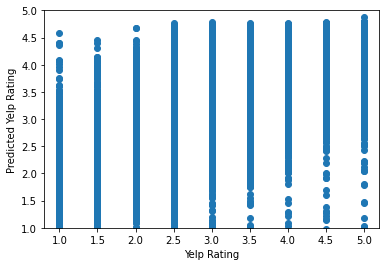

In [42]:
# create a model on selected features 
model_these_features(selected_features)

## Danielle's Delicious Delicacies' Debut

The best model was the model using all features, so we'll work with this model again. 

Run the cell below to grab all the features and retrain our model on them.

In [43]:
features = df.loc[:,all_features]
ratings = df.loc[:,'stars']
X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

To give you some perspective on the restaurants already out there, the mean, minimum, and maximum values for each feature are provided below. 

In [44]:
pd.DataFrame(list(zip(features.columns,features.describe().loc['mean'],features.describe().loc['min'],features.describe().loc['max'])),columns=['Feature','Mean','Min','Max'])

,Feature,Mean,Min,Max
0,alcohol?,0.140610,0.000000,1.000000
1,has_bike_parking,0.350692,0.000000,1.000000
2,takes_credit_cards,0.700243,0.000000,1.000000
3,good_for_kids,0.279029,0.000000,1.000000
4,take_reservations,0.106086,0.000000,1.000000
5,has_wifi,0.134968,0.000000,1.000000
6,review_count,31.797310,3.000000,7968.000000
7,price_range,1.035855,0.000000,4.000000
8,average_caption_length,2.831829,0.000000,140.000000
9,number_pics,1.489939,0.000000,1150.000000


Test model with new data to predict Yelp rating! 

In [45]:
danielles_delicious_delicacies = np.array([0,1,1,1,1,1,10,2,3,10,10,1200,0.9,3,6,5,50,3,50,1800,12,123,0.5,0,0]).reshape(1,-1)

In [46]:
model.predict(danielles_delicious_delicacies)

/Users/amoke/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.03799004])